HR Attrition Analytics

In [2]:
import xlrd
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
df = pd.read_csv('recruitment_evaluation_data_1.csv')
salary = pd.read_excel('salary_by_dept&joblevel_1.xlsx')

IOError: File recruitment_evaluation_data_1.csv does not exist

In [ ]:
plt.matshow(df.corr())



In [4]:
df.head(1)

,b,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,...,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,SalesRating,HireSource,Campus
0,1,41,1,Travel_Rarely,1102,Sales,1,2,LifeSciences,1,...,8,0,1,6,4,0,5,1.08819,AppliedOnline,Null


In [5]:
salary.head(1)

,Dept,Job_Level,a,Mean_Salary
0,Sales,1,38269,44009.35


Mergering the data df and salary by Department and Job level


In [6]:
df2=df.merge(salary,left_on=['Department','JobLevel'], right_on=['Dept','Job_Level'], how='left')
len(df2)

1470

In [7]:
df2['Annual_Income']= df2.MonthlyIncome*12

Finding the salary difference as compared to Market mean salary for respective occupations

In [8]:
df2['Salary_diff']= df2['Annual_Income']- df2['Mean_Salary']

Finding mean of salary by attrition and department. Here we found for departmnt HR and Research & Development who had lesser salary compare to market mean salary were leaving the company. 

In [9]:
df2.groupby(['Attrition','Department'])['Salary_diff'].mean()

Attrition  Department            
0          HumanResources            29697.309804
           Research & Development    11217.774155
           Sales                     36509.228955
1          HumanResources            -9574.658333
           Research & Development   -12252.429323
           Sales                     22142.103261
Name: Salary_diff, dtype: float64

In [10]:
df3=df2.groupby('Department')['Attrition'].agg({'size','sum'}).rename(columns={'size':'total','sum':'num_of_att'})

In [11]:
df2=df2.drop(['a','b','Annual_Income','EmployeeNumber','DailyRate','HourlyRate','MonthlyRate','StandardHours','Dept','SalesRating','HireSource','Campus','Mean_Salary'],axis=1)

In [12]:
df2.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,...,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Job_Level,Salary_diff
0,41,1,Travel_Rarely,Sales,1,2,LifeSciences,2,Female,3,...,0,8,0,1,6,4,0,5,2,24946.55
1,49,0,Travel_Frequently,Research & Development,8,1,LifeSciences,3,Male,2,...,1,10,3,3,10,7,1,7,2,431.75
2,37,1,Travel_Rarely,Research & Development,2,2,Other,4,Male,2,...,0,7,3,3,0,0,0,0,1,-32324.55
3,33,0,Travel_Frequently,Research & Development,3,4,LifeSciences,4,Female,3,...,0,8,3,3,8,7,3,0,1,-22496.55
4,27,0,Travel_Rarely,Research & Development,2,1,Medical,1,Male,3,...,1,6,3,3,2,2,2,2,1,-15788.55


#Binning the variables


In [13]:
df2.DistanceFromHome.describe()

count    1470.000000
mean        9.192517
std         8.106864
min         1.000000
25%         2.000000
50%         7.000000
75%        14.000000
max        29.000000
Name: DistanceFromHome, dtype: float64

In [13]:
df2.loc[df2.DistanceFromHome<=2,'DistanceFromHome_bin']='Within_2_miles'
df2.loc[(df2.DistanceFromHome>2) & (df2.DistanceFromHome<=7),'DistanceFromHome_bin']='Greater_than_2_miles_less_than_7'
df2.loc[(df2.DistanceFromHome>7) & (df2.DistanceFromHome<=14),'DistanceFromHome_bin']='Greater_than_7_miles_less_than_14'
df2.loc[(df2.DistanceFromHome>14),'DistanceFromHome_bin']='Greater_than_14'


In [14]:
df2.NumCompaniesWorked.describe()

count    1470.000000
mean        2.693197
std         2.498009
min         0.000000
25%         1.000000
50%         2.000000
75%         4.000000
max         9.000000
Name: NumCompaniesWorked, dtype: float64

In [15]:
df2.loc[df2.NumCompaniesWorked<=1,'NumCompaniesWorked_bin']='One'
df2.loc[(df2.NumCompaniesWorked>1) & (df2.NumCompaniesWorked<=2),'NumCompaniesWorked_bin']='Greater_than_1_less_than_2'
df2.loc[(df2.NumCompaniesWorked>2) & (df2.NumCompaniesWorked<=7),'NumCompaniesWorked_bin']='Greater_than_2_less_than_7'
df2.loc[(df2.NumCompaniesWorked>7),'NumCompaniesWorked_bin']='Greater_than_7'

In [16]:
df2.PercentSalaryHike.describe()

count    1470.000000
mean       15.209524
std         3.659938
min        11.000000
25%        12.000000
50%        14.000000
75%        18.000000
max        25.000000
Name: PercentSalaryHike, dtype: float64

In [17]:
df2.loc[df2.PercentSalaryHike<=12,'PercentSalaryHike_bin']='Less_than_12'
df2.loc[(df2.PercentSalaryHike>12) & (df2.PercentSalaryHike<=14),'PercentSalaryHike_bin']='Greater_than_12_less_than_14'
df2.loc[(df2.PercentSalaryHike>14) & (df2.PercentSalaryHike<=18),'PercentSalaryHike_bin']='Greater_than_14_less_than_18'
df2.loc[(df2.PercentSalaryHike>18),'PercentSalaryHike_bin']='Greater_than_18'

In [18]:
df2.YearsAtCompany.describe()

count    1470.000000
mean        7.008163
std         6.126525
min         0.000000
25%         3.000000
50%         5.000000
75%         9.000000
max        40.000000
Name: YearsAtCompany, dtype: float64

In [19]:
df2.loc[df2.YearsAtCompany<=3,'YearsAtCompany_bin']='Less_than_3'
df2.loc[(df2.YearsAtCompany>3) & (df2.YearsAtCompany<=5),'YearsAtCompany_bin']='Greater_than_3_less_than_5'
df2.loc[(df2.YearsAtCompany>5) & (df2.YearsAtCompany<=9),'YearsAtCompany_bin']='Greater_than_5_less_than_9'
df2.loc[(df2.YearsAtCompany>9),'YearsAtCompany_bin']='Greater_than_9'

In [20]:
df2.YearsInCurrentRole.describe()

count    1470.000000
mean        4.229252
std         3.623137
min         0.000000
25%         2.000000
50%         3.000000
75%         7.000000
max        18.000000
Name: YearsInCurrentRole, dtype: float64

In [21]:
df2.loc[df2.YearsInCurrentRole<=2,'YearsInCurrentRole_bin']='Less_than_2'
df2.loc[(df2.YearsInCurrentRole>2) & (df2.YearsInCurrentRole<=3),'YearsInCurrentRole_bin']='Greater_than_2_less_than_3'
df2.loc[(df2.YearsInCurrentRole>3) & (df2.YearsInCurrentRole<=7),'YearsInCurrentRole_bin']='Greater_than_3_less_than_7'
df2.loc[(df2.YearsInCurrentRole>7),'YearsInCurrentRole_bin']='Greater_than_7'

In [22]:
df2.YearsSinceLastPromotion.describe()

count    1470.000000
mean        2.187755
std         3.222430
min         0.000000
25%         0.000000
50%         1.000000
75%         3.000000
max        15.000000
Name: YearsSinceLastPromotion, dtype: float64

In [23]:
df2.loc[df2.YearsSinceLastPromotion<=0,'YearsSinceLastPromotion_bin']='Zero'
df2.loc[(df2.YearsSinceLastPromotion>0) & (df2.YearsSinceLastPromotion<=1),'YearsSinceLastPromotion_bin']='Greater_than_0_less_than_1'
df2.loc[(df2.YearsSinceLastPromotion>1) & (df2.YearsSinceLastPromotion<=3),'YearsSinceLastPromotion_bin']='Greater_than_1_less_than_3'
df2.loc[(df2.YearsSinceLastPromotion>3),'YearsSinceLastPromotion_bin']='Greater_than_3'

In [24]:
df2.YearsWithCurrManager.describe()

count    1470.000000
mean        4.123129
std         3.568136
min         0.000000
25%         2.000000
50%         3.000000
75%         7.000000
max        17.000000
Name: YearsWithCurrManager, dtype: float64

In [25]:
df2.loc[df2.YearsWithCurrManager<=2,'YearsWithCurrManager_bin']='Less_than_2'
df2.loc[(df2.YearsWithCurrManager>2) & (df2.YearsWithCurrManager<=3),'YearsWithCurrManager_bin']='Greater_than_2_less_than_3'
df2.loc[(df2.YearsWithCurrManager>3) & (df2.YearsWithCurrManager<=7),'YearsWithCurrManager_bin']='Greater_than_3_less_than_7'
df2.loc[(df2.YearsWithCurrManager>7),'YearsWithCurrManager_bin']='Greater_than_7'

In [26]:
df2.Age.describe()

count    1470.000000
mean       36.923810
std         9.135373
min        18.000000
25%        30.000000
50%        36.000000
75%        43.000000
max        60.000000
Name: Age, dtype: float64

In [27]:
df2.loc[df2.Age<=30,'Age_bin']='Less_than_30'
df2.loc[(df2.Age>30) & (df2.Age<=36),'Age_bin']='Greater_than_30_less_than_36'
df2.loc[(df2.Age>36) & (df2.Age<=43),'Age_bin']='Greater_than_36_less_than_43'
df2.loc[(df2.Age>43),'Age_bin']='Greater_than_43'

In [28]:
df2.Age_bin.nunique()

4

In [29]:
df2.TotalWorkingYears.describe()

count    1470.000000
mean       11.279592
std         7.780782
min         0.000000
25%         6.000000
50%        10.000000
75%        15.000000
max        40.000000
Name: TotalWorkingYears, dtype: float64

In [30]:
df2.loc[df2.TotalWorkingYears<=6,'TotalWorkingYears_bin']='Less_than_6'
df2.loc[(df2.TotalWorkingYears>6) & (df2.TotalWorkingYears<=10),'TotalWorkingYears_bin']='Greater_than_6_less_than_10'
df2.loc[(df2.TotalWorkingYears>10) & (df2.TotalWorkingYears<=15),'TotalWorkingYears_bin']='Greater_than_10_less_than_15'
df2.loc[(df2.TotalWorkingYears>15),'TotalWorkingYears_bin']='Greater_than_15'

In [31]:
df2.loc[df2.Age<=30,'Age_bin_customized_6_bin']='Less_than_30'
df2.loc[(df2.Age>30) & (df2.Age<=35),'Age_bin_customized_6_bin']='Greater_than_30_less_than_35'
df2.loc[(df2.Age>35) & (df2.Age<=40),'Age_bin_customized_6_bin']='Greater_than_35_less_than_40'
df2.loc[(df2.Age>40) & (df2.Age<=45),'Age_bin_customized_6_bin']='Greater_than_40_less_than_45'
df2.loc[(df2.Age>45) & (df2.Age<=50),'Age_bin_customized_6_bin']='Greater_than_45_less_than_50'
df2.loc[(df2.Age>50),'Age_bin_customized_6_bin']='Greater_than_50'

In [32]:
df2.groupby('Age_bin_customized_6_bin').count()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,...,Salary_diff,DistanceFromHome_bin,NumCompaniesWorked_bin,PercentSalaryHike_bin,YearsAtCompany_bin,YearsInCurrentRole_bin,YearsSinceLastPromotion_bin,YearsWithCurrManager_bin,Age_bin,TotalWorkingYears_bin
Age_bin_customized_6_bin,,,,,,,,,,,,,,,,,,,,,
Greater_than_30_less_than_35,343,343,343,343,343,343,343,343,343,343,...,343,343,343,343,343,343,343,343,343,343
Greater_than_35_less_than_40,276,276,276,276,276,276,276,276,276,276,...,276,276,276,276,276,276,276,276,276,276
Greater_than_40_less_than_45,192,192,192,192,192,192,192,192,192,192,...,192,192,192,192,192,192,192,192,192,192
Greater_than_45_less_than_50,130,130,130,130,130,130,130,130,130,130,...,130,130,130,130,130,130,130,130,130,130
Greater_than_50,143,143,143,143,143,143,143,143,143,143,...,143,143,143,143,143,143,143,143,143,143
Less_than_30,386,386,386,386,386,386,386,386,386,386,...,386,386,386,386,386,386,386,386,386,386


In [117]:
df2.loc[df2.Age<=29,'Age_bin_customized']='Less_than_29'
df2.loc[(df2.Age>29) & (df2.Age<=33),'Age_bin_customized']='Greater_than_29_less_than_33'
df2.loc[(df2.Age>33) & (df2.Age<=38),'Age_bin_customized']='Greater_than_33_less_than_38'
df2.loc[(df2.Age>38) & (df2.Age<=45),'Age_bin_customized']='Greater_than_38_less_than_45'
df2.loc[(df2.Age>45),'Age_bin_customized']='Greater_than_45'

In [118]:
df2.groupby('Age_bin_customized').count()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,...,DistanceFromHome_bin,NumCompaniesWorked_bin,PercentSalaryHike_bin,YearsAtCompany_bin,YearsInCurrentRole_bin,YearsSinceLastPromotion_bin,YearsWithCurrManager_bin,Age_bin,TotalWorkingYears_bin,Age_bin_customized_6_bin
Age_bin_customized,,,,,,,,,,,,,,,,,,,,,
Greater_than_29_less_than_33,248,248,248,248,248,248,248,248,248,248,...,248,248,248,248,248,248,248,248,248,248
Greater_than_33_less_than_38,332,332,332,332,332,332,332,332,332,332,...,332,332,332,332,332,332,332,332,332,332
Greater_than_38_less_than_45,291,291,291,291,291,291,291,291,291,291,...,291,291,291,291,291,291,291,291,291,291
Greater_than_45,273,273,273,273,273,273,273,273,273,273,...,273,273,273,273,273,273,273,273,273,273
Less_than_29,326,326,326,326,326,326,326,326,326,326,...,326,326,326,326,326,326,326,326,326,326


In [122]:
df2.loc[(df2.JobSatisfaction<=2) & df2.DistanceFromHome<=2,'Job_distance_bin']='Job_Satisfication_less2_&_Within_2_miles'
df2.loc[(df2.JobSatisfaction<=2) &(df2.DistanceFromHome>2) & (df2.DistanceFromHome<=7),'Job_distance_bin']='Job_Satisfication_less2_&Greater_than_2_miles_less_than_7'
df2.loc[(df2.JobSatisfaction<=2) &(df2.DistanceFromHome>7) & (df2.DistanceFromHome<=14),'Job_distance_bin']='Job_Satisfication_less2_&Greater_than_7_miles_less_than_14'
df2.loc[(df2.JobSatisfaction<=2) &(df2.DistanceFromHome>14),'Job_distance_bin']='Job_Satisfication_less2__&_Greater_than_14'
df2.loc[(df2.JobSatisfaction>2) & df2.DistanceFromHome<=2,'Job_distance_bin']='Job_Satisfication_more2_&_Within_2_miles'
df2.loc[(df2.JobSatisfaction>2) &(df2.DistanceFromHome>2) & (df2.DistanceFromHome<=7),'Job_distance_bin']='Job_Satisfication_more2_&Greater_than_2_miles_less_than_7'
df2.loc[(df2.JobSatisfaction>2) &(df2.DistanceFromHome>7) & (df2.DistanceFromHome<=14),'Job_distance_bin']='Job_Satisfication_more2_&Greater_than_7_miles_less_than_14'
df2.loc[(df2.JobSatisfaction>2) &(df2.DistanceFromHome>14),'Job_distance_bin']='Job_Satisfication_more2_&_Greater_than_14'

In [35]:
df3=df2.drop(['Age_bin_customized','Age_bin_customized_6_bin'], axis=1)

In [36]:
df4=df2.drop(['Age_bin','Age_bin_customized_6_bin'], axis=1)

In [37]:
df5=df2.drop(['Age_bin_customized','Age_bin'], axis=1)

In [38]:
df3=df3.drop('Age',axis=1)

In [39]:
df3.head()


,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,...,Salary_diff,DistanceFromHome_bin,NumCompaniesWorked_bin,PercentSalaryHike_bin,YearsAtCompany_bin,YearsInCurrentRole_bin,YearsSinceLastPromotion_bin,YearsWithCurrManager_bin,Age_bin,TotalWorkingYears_bin
0,1,Travel_Rarely,Sales,1,2,LifeSciences,2,Female,3,2,...,24946.55,Within_2_miles,Greater_than_7,Less_than_12,Greater_than_5_less_than_9,Greater_than_3_less_than_7,Zero,Greater_than_3_less_than_7,Greater_than_36_less_than_43,Greater_than_6_less_than_10
1,0,Travel_Frequently,Research & Development,8,1,LifeSciences,3,Male,2,2,...,431.75,Greater_than_7_miles_less_than_14,One,Greater_than_18,Greater_than_9,Greater_than_3_less_than_7,Greater_than_0_less_than_1,Greater_than_3_less_than_7,Greater_than_43,Greater_than_6_less_than_10
2,1,Travel_Rarely,Research & Development,2,2,Other,4,Male,2,1,...,-32324.55,Within_2_miles,Greater_than_2_less_than_7,Greater_than_14_less_than_18,Less_than_3,Less_than_2,Zero,Less_than_2,Greater_than_36_less_than_43,Greater_than_6_less_than_10
3,0,Travel_Frequently,Research & Development,3,4,LifeSciences,4,Female,3,1,...,-22496.55,Greater_than_2_miles_less_than_7,One,Less_than_12,Greater_than_5_less_than_9,Greater_than_3_less_than_7,Greater_than_1_less_than_3,Less_than_2,Greater_than_30_less_than_36,Greater_than_6_less_than_10
4,0,Travel_Rarely,Research & Development,2,1,Medical,1,Male,3,1,...,-15788.55,Within_2_miles,Greater_than_7,Less_than_12,Less_than_3,Less_than_2,Greater_than_1_less_than_3,Less_than_2,Less_than_30,Less_than_6


In [123]:
df3['OverTime_bin']=(df3.OverTime=='Yes')+0.0

AttributeError: 'DataFrame' object has no attribute 'OverTime'

In [82]:
df3_dummy.groupby('Attrition')['OverTime_bin','MonthlyIncome'].mean()

,OverTime_bin,MonthlyIncome
Attrition,,
0,0.234388,6832.739659
1,0.535865,4787.092827


In [124]:
df3=df3.drop(['JobRole','OverTime','DistanceFromHome','PercentSalaryHike','NumCompaniesWorked','TotalWorkingYears','TrainingTimesLastYear','YearsWithCurrManager','YearsAtCompany','YearsInCurrentRole','YearsSinceLastPromotion'],axis=1)

ValueError: labels ['JobRole' 'OverTime' 'DistanceFromHome' 'PercentSalaryHike'
 'NumCompaniesWorked' 'TotalWorkingYears' 'TrainingTimesLastYear'
 'YearsWithCurrManager' 'YearsAtCompany' 'YearsInCurrentRole'
 'YearsSinceLastPromotion'] not contained in axis

In [133]:
df3_dummy1= pd.get_dummies(df3,columns=['BusinessTravel','TotalWorkingYears_bin','YearsWithCurrManager_bin','YearsSinceLastPromotion_bin','YearsAtCompany_bin','YearsInCurrentRole_bin','Department','EducationField','PercentSalaryHike_bin','Age_bin','Gender','NumCompaniesWorked_bin' ])

In [125]:
df3=df3.drop(['JobSatisfaction','DistanceFromHome_bin'],axis=1)

#Clustering

In [116]:
df3.corr().to_csv('csvcroo.csv')

In [43]:
df3_dummy.head()

,Attrition,Education,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,...,Gender_Female,Gender_Male,DistanceFromHome_bin_Greater_than_14,DistanceFromHome_bin_Greater_than_2_miles_less_than_7,DistanceFromHome_bin_Greater_than_7_miles_less_than_14,DistanceFromHome_bin_Within_2_miles,NumCompaniesWorked_bin_Greater_than_1_less_than_2,NumCompaniesWorked_bin_Greater_than_2_less_than_7,NumCompaniesWorked_bin_Greater_than_7,NumCompaniesWorked_bin_One
0,1,2,2,3,2,4,5993,3,1,0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0,1,3,2,2,2,5130,3,4,1,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,1,2,4,2,1,3,2090,2,2,0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3,0,4,4,3,1,3,2909,3,3,0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0,1,1,3,1,2,3468,3,4,1,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


Finding attrition rate

In [88]:
clusters=df3_dummy

In [92]:
from sklearn.cluster import KMeans
clu = KMeans(n_clusters=2, random_state=0)
clu.fit(clusters)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)

In [93]:
clusters['cluster'] = clu.labels_

In [94]:
clusterz=clusters.groupby('cluster').mean()

In [95]:
clusterz

,Attrition,Education,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,...,Gender_Female,Gender_Male,DistanceFromHome_bin_Greater_than_14,DistanceFromHome_bin_Greater_than_2_miles_less_than_7,DistanceFromHome_bin_Greater_than_7_miles_less_than_14,DistanceFromHome_bin_Within_2_miles,NumCompaniesWorked_bin_Greater_than_1_less_than_2,NumCompaniesWorked_bin_Greater_than_2_less_than_7,NumCompaniesWorked_bin_Greater_than_7,NumCompaniesWorked_bin_One
cluster,,,,,,,,,,,,,,,,,,,,,
0,0.178796,2.875112,2.728661,2.743935,1.580413,2.743037,4228.996406,2.902965,2.679245,0.787960,...,0.393531,0.606469,0.243486,0.233603,0.238994,0.283917,0.086253,0.307278,0.064690,0.541779
1,0.106443,3.030812,2.700280,2.686275,3.571429,2.683473,13592.257703,2.935574,2.815126,0.812325,...,0.420168,0.579832,0.235294,0.268908,0.207283,0.288515,0.140056,0.456583,0.081232,0.322129


In [188]:
X=df3_dummy1.drop(['Attrition'],axis=1)
Y=df3_dummy1.Attrition


In [189]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.6,random_state=2)

In [190]:
import sklearn as sk
import sklearn.tree as tree
from IPython.display import Image  
import pydotplus

In [191]:
dt = tree.DecisionTreeClassifier(max_depth=3)
dt.fit(X=X,y=Y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

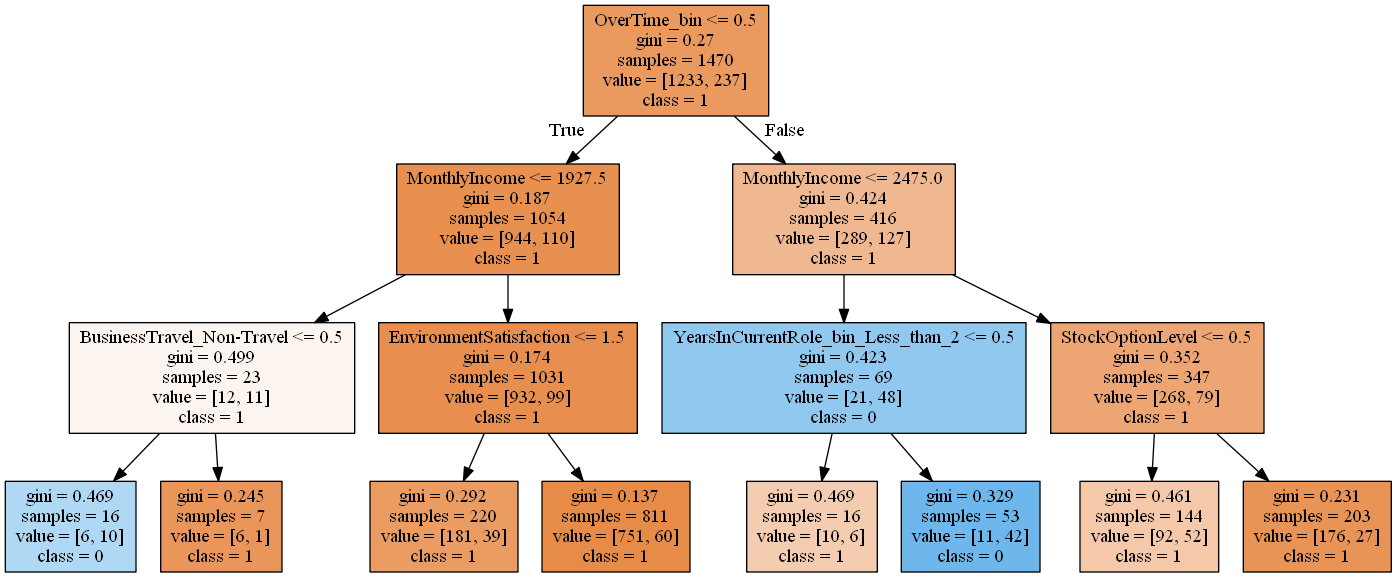

In [192]:
dt_x1`feature_names = list(X.columns)
dt_target_names = np.array(Y.unique(),dtype=np.string_) 
tree.export_graphviz(dt, out_file='tree.dot', 
    feature_names=dt_feature_names, class_names=dt_target_names,
    filled=True)  
graph = pydotplus.graph_from_dot_file('tree.dot')
Image(graph.create_png())



In [153]:
df2['MonthlyIncome_bin']= df2.MonthlyIncome <= 1927.5

In [152]:
df2.MonthlyIncome.describe()

count     1470.000000
mean      6502.931293
std       4707.956783
min       1009.000000
25%       2911.000000
50%       4919.000000
75%       8379.000000
max      19999.000000
Name: MonthlyIncome, dtype: float64

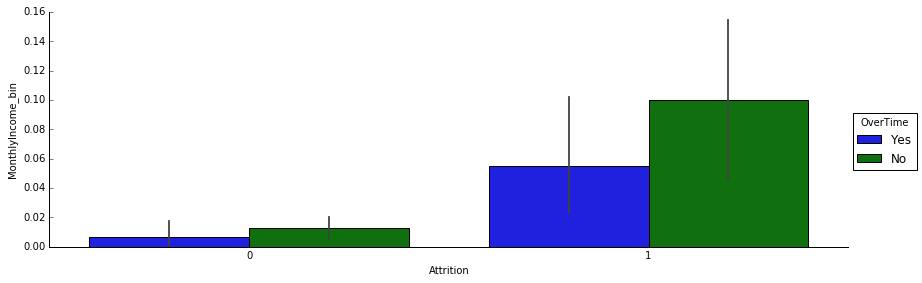

In [162]:
sns.factorplot(x='Attrition',y='MonthlyIncome',hue='OverTime', data=df2 ,kind='bar', aspect=3)

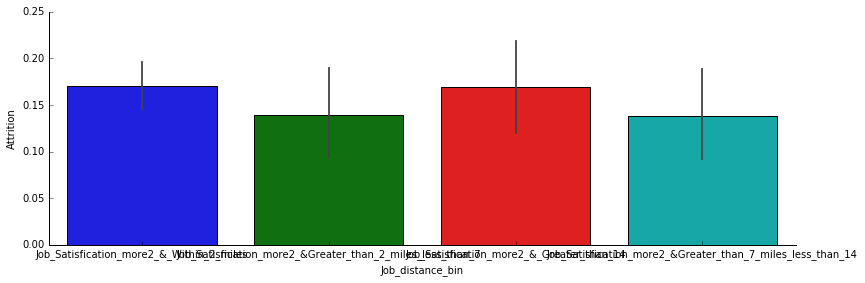

In [161]:
sns.factorplot(x='Job_distance',y='Attrition', data=df2 ,hue='JobSatisfaction',kind='bar', aspect=3)

In [160]:
df2.Job_distance_bin

0                Job_Satisfication_more2_&_Within_2_miles
1                Job_Satisfication_more2_&_Within_2_miles
2                Job_Satisfication_more2_&_Within_2_miles
3       Job_Satisfication_more2_&Greater_than_2_miles_...
4                Job_Satisfication_more2_&_Within_2_miles
5                Job_Satisfication_more2_&_Within_2_miles
6                Job_Satisfication_more2_&_Within_2_miles
7               Job_Satisfication_more2_&_Greater_than_14
8               Job_Satisfication_more2_&_Greater_than_14
9               Job_Satisfication_more2_&_Greater_than_14
10               Job_Satisfication_more2_&_Within_2_miles
11              Job_Satisfication_more2_&_Greater_than_14
12              Job_Satisfication_more2_&_Greater_than_14
13              Job_Satisfication_more2_&_Greater_than_14
14              Job_Satisfication_more2_&_Greater_than_14
15               Job_Satisfication_more2_&_Within_2_miles
16               Job_Satisfication_more2_&_Within_2_miles
17            

In [50]:
df2.head(5)

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,...,NumCompaniesWorked_bin,PercentSalaryHike_bin,YearsAtCompany_bin,YearsInCurrentRole_bin,YearsSinceLastPromotion_bin,YearsWithCurrManager_bin,Age_bin,TotalWorkingYears_bin,Age_bin_customized_6_bin,Age_bin_customized
0,41,1,Travel_Rarely,Sales,1,2,LifeSciences,2,Female,3,...,Greater_than_7,Less_than_12,Greater_than_5_less_than_9,Greater_than_3_less_than_7,Zero,Greater_than_3_less_than_7,Greater_than_36_less_than_43,Greater_than_6_less_than_10,Greater_than_40_less_than_45,Greater_than_38_less_than_45
1,49,0,Travel_Frequently,Research & Development,8,1,LifeSciences,3,Male,2,...,One,Greater_than_18,Greater_than_9,Greater_than_3_less_than_7,Greater_than_0_less_than_1,Greater_than_3_less_than_7,Greater_than_43,Greater_than_6_less_than_10,Greater_than_45_less_than_50,Greater_than_45
2,37,1,Travel_Rarely,Research & Development,2,2,Other,4,Male,2,...,Greater_than_2_less_than_7,Greater_than_14_less_than_18,Less_than_3,Less_than_2,Zero,Less_than_2,Greater_than_36_less_than_43,Greater_than_6_less_than_10,Greater_than_35_less_than_40,Greater_than_33_less_than_38
3,33,0,Travel_Frequently,Research & Development,3,4,LifeSciences,4,Female,3,...,One,Less_than_12,Greater_than_5_less_than_9,Greater_than_3_less_than_7,Greater_than_1_less_than_3,Less_than_2,Greater_than_30_less_than_36,Greater_than_6_less_than_10,Greater_than_30_less_than_35,Greater_than_29_less_than_33
4,27,0,Travel_Rarely,Research & Development,2,1,Medical,1,Male,3,...,Greater_than_7,Less_than_12,Less_than_3,Less_than_2,Greater_than_1_less_than_3,Less_than_2,Less_than_30,Less_than_6,Less_than_30,Less_than_29


In [51]:
cluster= pd.get_dummies(df2,columns=['Gender','BusinessTravel', 'Department','EducationField','JobRole','OverTime','HireSource','Dept','Campus'])
clusters=cluster.drop(['Dept','Job_Level','a','b','DailyRate','EmployeeNumber','HourlyRate','MonthlyIncome','MonthlyRate','StandardHours'],axis=1)

ValueError: labels ['HireSource' 'Dept' 'Campus'] not contained in axis

In [ ]:
clusters=cluster.drop(['Job_Level','a','b','DailyRate','EmployeeNumber','HourlyRate','MonthlyIncome','MonthlyRate','StandardHours'],axis=1)

In [ ]:
from sklearn.cluster import KMeans
clu = KMeans(n_clusters=2, random_state=0)
clu.fit(clusters)

In [ ]:
clusters['cluster'] = clu.labels_

In [134]:
import sklearn as sk
import sklearn.tree as tree
from IPython.display import Image  
import pydotplusclusterz=clusters.groupby('cluster').mean()
clusterz

SyntaxError: invalid syntax (<ipython-input-134-e81e0c37946d>, line 4)

In [135]:
import sklearn as sk
import sklearn.tree as tree
from IPython.display import Image  
import pydotplus

In [136]:
df5= pd.get_dummies(df2,columns=['Gender','BusinessTravel', 'Department','EducationField','OverTime','HireSource','Dept','Campus'])
df6=df5.drop(['Mean_Salary','Job_Level','a','b','DailyRate','EmployeeNumber','HourlyRate','MonthlyIncome','MonthlyRate','StandardHours','JobRole'],axis=1)

ValueError: labels ['HireSource' 'Dept' 'Campus'] not contained in axis

In [ ]:
X=df6.drop('Attrition', axis=1)
Y=df6.Attrition

In [ ]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, log_loss
from imblearn.over_sampling import SMOTE


In [ ]:
# Import the train_test_split method
from sklearn.cross_validation import train_test_split
from sklearn.cross_validation import StratifiedShuffleSplit

# Split data into train and test sets as well as for validation and testing
train, test, target_train, target_val = train_test_split(X, Y, train_size= 0.75,random_state=0);
#train, test, target_train, target_val = StratifiedShuffleSplit(attrition_final, target, random_state=0);fX

In [ ]:
dt = tree.DecisionTreeClassifier(max_depth=2)
dt.fit(X=smote_train,y=)

In [ ]:
dt = tree.DecisionTreeClassifier(max_depth=2)
dt.fit(X,y=Y)

In [ ]:
smote_train

In [ ]:
dt_feature_names = list(X.columns)
dt_target_names = np.array(Y.unique(),dtype=np.string_) 
tree.export_graphviz(dt, out_file='tree.dot', 
    feature_names=dt_feature_names, class_names=dt_target_names,
    filled=True)  

graph = pydotplus.graph_from_dot_file('tree.dot')
Image(graph.create_png())

In [ ]:
df6.corr()